# Basics of quibits, gates, and circuits.

A qubit is the fundamental unit of quantum information. In quantum computing, logical operations are designed to act on qubits, treating them as idealized, perfectly isolated quantum systems—often referred to as pure or closed states. However, in real-world quantum hardware, qubits are susceptible to imperfections caused by environmental noise and other disturbances. To address these challenges, quantum error correction and mitigation techniques are employed separately. This distinction ensures that the core principles of quantum computing remain universal and independent of specific hardware constraints.

## Representing a logical qubit
The state of an ideal qubit can be represented as a 2-dimensional unit vector and visualized as a point on the *Bloch **sphere** (see the red dot below). Any point on this sphere represents a linear combination of the 0 and 1 states with complex coefficients. A π/2-pulse 'rotates' a qubit from the 0-state to a superposition state. 

![The Bloch Sphere][blochSphereImage]

[blochSphereImage]: ./images/The-Bloch-sphere.png

A qubit’s state is mathematically represented as a superposition, meaning it exists in a linear combination of its two basis states, |0⟩ and |1⟩, until it is measured. This state is expressed as:


\[
|\psi\rangle = a|0\rangle + b|1\rangle
\]


where  a  and  b  are complex probability amplitudes that determine the likelihood of the qubit collapsing into either basis state upon measurement. The squared magnitudes of these amplitudes, 
$a^{2}$ and $b^{2}$, represent the probabilities of measuring the qubit in state |0⟩ or |1⟩, respectively, ensuring that $a^{2}$ + $b^{2}$ = 1.

Measurement forces the qubit to ‘collapse’ into one of these definite states, losing its superposition. This fundamental property of quantum mechanics underlies quantum computation and differentiates qubits from classical bits, which can only exist in one state at a time.”

## Quantum logic gates
Quantum logic gates are fundamental operations that manipulate qubits by transforming their quantum states. Unlike classical logic gates, which operate on binary bits (0 and 1), quantum gates modify a qubit’s state by applying unitary transformations, effectively rotating them to different positions on the Bloch sphere—a geometric representation of qubit states.

Single-qubit gates play a crucial role in quantum computation. Some key examples include:
- **Pauli Gates (X, Y, Z)**: These represent 180-degree rotations around the X, Y, and Z axes of the Bloch sphere.
  - The X gate (quantum NOT gate) flips |0⟩ to |1⟩ and vice versa.
  - The Y gate introduces a phase shift while flipping the state.
  - The Z gate applies a phase shift to |1⟩ while leaving |0⟩ unchanged.
 
- **Hadamard Gate (H)**: This gate creates superposition by transforming the computational basis states |0⟩ and |1⟩ into equal superpositions of both:

$H|0⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩), \quad H|1⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩).$

This allows quantum algorithms to leverage parallelism, a key advantage over classical computing.

Beyond single-qubit operations, quantum circuits also utilize multi-qubit gates like the CNOT (Controlled-NOT) gate, which entangles qubits—a fundamental feature enabling quantum advantage. The collective application of these gates forms the basis of quantum algorithms, driving advancements in quantum computing.

## Quantum circuits
n quantum computing, algorithms are implemented by combining quantum logic gates into structured quantum circuits. These circuits follow a fundamental three-stage process: encoding input data, executing computations, and extracting results through measurement.

The first step, encoding the input, involves preparing the initial quantum state by applying specific gates that map classical information onto qubits. This stage is crucial because different problems require different ways of encoding data, ensuring that the quantum system begins in a state suited for computation. Once the input is set, the circuit proceeds to the execution phase, where a sequence of quantum gates manipulates the qubits according to the algorithm’s logic. Unlike classical computation, this process leverages the principles of superposition, entanglement, and quantum interference, allowing quantum circuits to explore multiple computational paths simultaneously.

Finally, the measurement stage collapses the quantum state, converting the qubits into classical bits that can be read as output. Because quantum measurement is inherently probabilistic, multiple runs of the same circuit may be needed to obtain reliable results. While the gates responsible for encoding the input must change whenever a different dataset is used, the core computational operations remain the same for a given algorithm. This separation of input preparation from execution enhances the modularity and adaptability of quantum circuits, making them powerful tools for solving a wide range of computational problems.

## Simulate simple gates in Qiskit
Let’s first create and draw a circuit with one qubit and one classical bit.

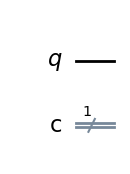

In [47]:
# Load qiskit functions into the local namespace
from qiskit import *       

# Creat a circuit qc with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,1)   

# Draw the circuit ('mpl'asks to render using Matplotlib) 
qc.draw(output = 'mpl')   

Let’s check the state of the qubit before applying any gates, in both vector and Bloch sphere representations.

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


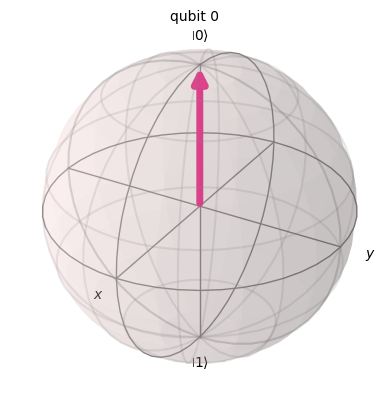

In [48]:
# subpackages need to be separately imported
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector

init_state = Statevector(qc);   
print(init_state)  

plot_bloch_multivector(init_state)

Let’s now add a gate to our circuit:

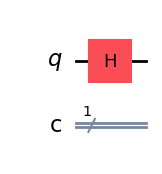

In [44]:
qc.h(0);                        # Apply a Hadamard to the q0 of qc
qc.draw(output = 'mpl')

Let’s check the qubit state again (in both vector and Bloch sphere representations):

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


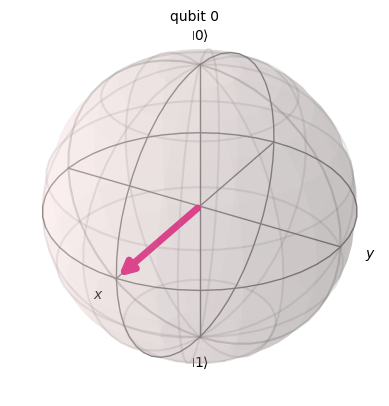

In [45]:
h_state = Statevector(qc); 
print(h_state)  

plot_bloch_multivector(h_state)

Let's now do a measurement:

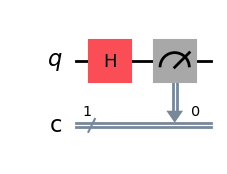

In [46]:
qc.measure(0, 0); # Measure qubit 0 to the classical bit 0
qc.draw(output='mpl')

Let’s now run the circuit on a quantum simulator and look at the statistical results of repeated circuit preparation & measurement:

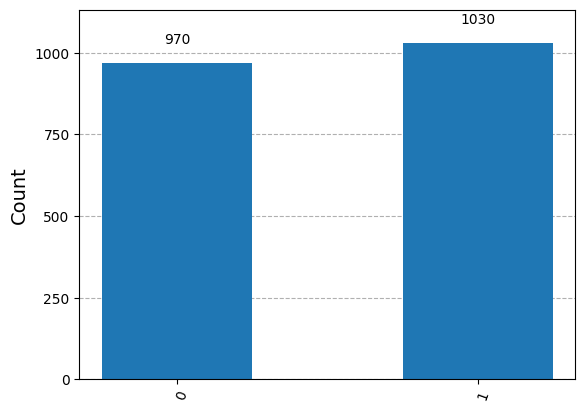

In [12]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=2000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)

Notice that the statistical output is ~50% for both 0 and 1, as the state vector resulting from the Hadamard had probability amplitudes a = b ≈ 0.707 (and therefore probabilities of measurement |a|² = |b|² = 0.5).

## Multi-qubit gates
Multi-qubit gates play a crucial role in quantum computing by enabling interactions between qubits, which is essential for entanglement and complex computations. Two fundamental examples are the Controlled-NOT (CNOT) gate and the Toffoli (CCNOT) gate.

The CNOT gate, also known as the controlled-X gate, acts on two qubits: a control qubit and a target qubit. It applies an X gate (which flips |0⟩ to |1⟩ and vice versa) to the target qubit, but only when the control qubit is in the state |1⟩. This operation creates entanglement, a key resource in quantum algorithms.

Similarly, the Toffoli gate, or CCNOT gate, extends this concept to three qubits. It applies an X gate to the target qubit only when both control qubits are in the state |1⟩. The Toffoli gate is particularly important because it is a reversible analog of the classical AND gate, making it useful in quantum circuits that require logical decision-making while preserving quantum information.

These multi-qubit gates are fundamental building blocks for quantum computation, allowing for complex operations that go beyond what is possible in classical computing.


![The Bloch Sphere][blochSphereImage]

[blochSphereImage]: ./images/CNOT.png

Below is a table showing possible inputs and corresponding outputs of the CNOT gate (for a classical-like scenario). The video linked above shows how to apply CNOT when q0 is in a superposition.
| **Input** (q₁q₀) | **Output** (q₁q₀) |
|------------------|------------------|
| 00              | 00              |
| 01              | 11              |
| 10              | 10              |
| 11              | 01              |


Caution, ordering: Qiskit uses the Lottle Endian convention |q(n-1)…q1q0⟩ by default. Matrices for multi-quit gates are ordered using the same convention. You may change the ordering using *circuit.reverse_bits()*. Example:

The regular Matrix representation of a CNOT gate as found in literature is:

The **CNOT gate** is represented by the following matrix:

\[
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
\]

However, in **Qiskit**, the matrix is represented as:

\[
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
\]

If you want to know more you could check out these posts/documentation:

- https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Basis-vector-ordering-in-Qiskit
- https://quantumcomputing.stackexchange.com/questions/8244/big-endian-vs-little-endian-in-qiskit

If you want to convert your Qiskit circuit to big endian you can just use the reverse_bits method:


In [35]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2)
circuit.cx(0, 1)

print('Little endian:')
print(Operator(circuit))

print('Big endian:')
print(Operator(circuit.reverse_bits()))

Little endian:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Big endian:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


**Let's simulate a CNOT gate.**
Preparing a circuit with the control bit as |1⟩:


Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


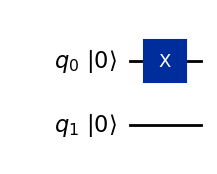

In [31]:
qc = QuantumCircuit(2)   # Make a circuit with 2 qubits (no classical bits)
qc.x(0)                  # Apply a gate to prepare the state of q0 into 1

print(Statevector(qc))

# initial_state=True shows the qubit values at the start
qc.draw(output='mpl', initial_state=True)  

The composite state vector above shows the probability amplitudes of [q1q0 = 00, q1q0=01, q1q0=10, q1q0=11], respectively. Thus, we now have q1q0 = 01.

Let’s look at both q0 and q1 on Bloch spheres:

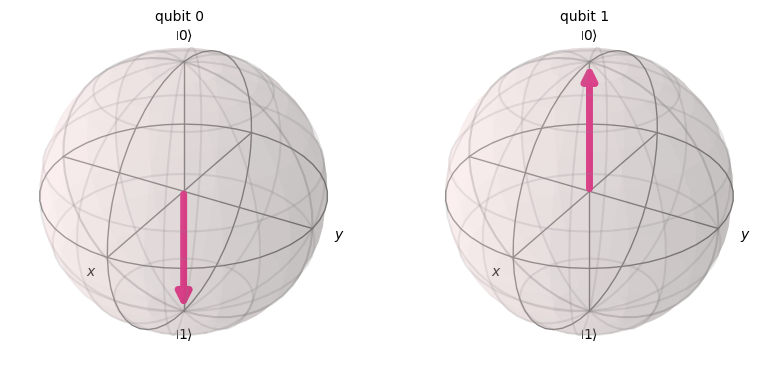

In [32]:
plot_bloch_multivector(qc)

Let’s now apply a CNOT:

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


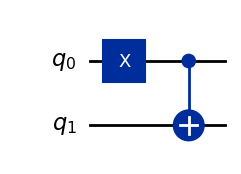

In [33]:
# Apply a CNOT gate with q0 as the control bit and q1 as the target bit
qc.cx(0,1)                
print(Statevector(qc))
qc.draw(output='mpl')

Now q1q0 = 11. That is, the X gate has flipped q1 (target) from 0 to 1, as the control bit (q0) is 1.

Let’s look at the Bloch spheres:

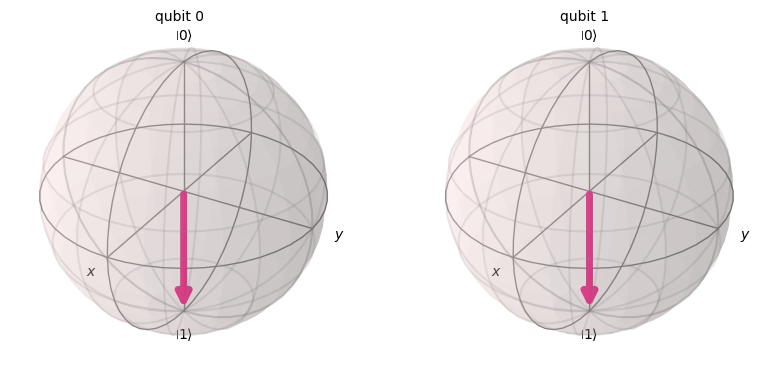

In [34]:
plot_bloch_multivector(qc)

## Simulating simple circuits in Qiskit
## The Half-Adder

The **half-adder** adds two bits as follows:

- \( 0 + 0 = 00 \)
- \( 0 + 1 = 01 \)
- \( 1 + 0 = 01 \)
- \( 1 + 1 = 10 \)

The first bit of the result represents the sum, while the second bit represents the carry.

The following Qiskit code constructs and visualizes the half-adder circuit. To improve readability and maintain logical separation, it is recommended to use the barrier() function. This ensures that different sections of the circuit remain distinct, preventing unintended optimizations by the compiler while enhancing clarity in the circuit diagram.

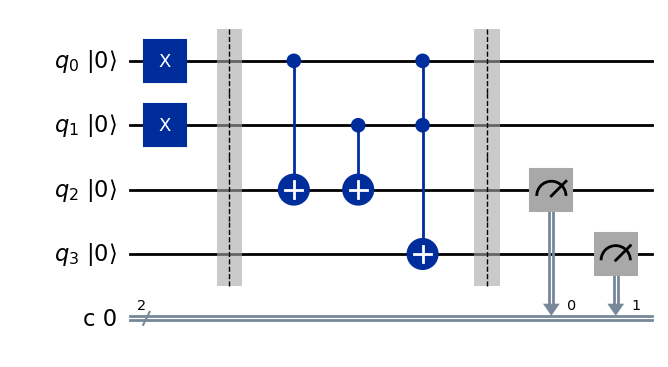

In [36]:
# Below, we add q1 + q0 and measure the result into classical bits c2c1
# The other qubits, q2 and q3 are only there to help

# Make a circuit with 4 qubits and 2 classical bits
qc_ha = QuantumCircuit(4,2)  

# encode inputs to perform q_1 + q_0 = 1 + 1 
qc_ha.x(0)          
qc_ha.x(1)          

qc_ha.barrier()   

# Code the algorithm 
qc_ha.cx(0,2)       # CNOT with q0 as control and q2 as target
qc_ha.cx(1,2)       # CNOT with q1 as control and q2 as target
qc_ha.ccx(0,1,3)    # CCNOT with q0, q1 as controls and q3 as target

qc_ha.barrier()

# extract outputs 
qc_ha.measure(2,0)  # Measure qubit 2 into classical bit 0
qc_ha.measure(3,1)  # Measure qubit 3 into classical bit 1

# initial_state=True displays (doesn't set) the left-most values of qubits
qc_ha.draw(output = 'mpl', initial_state=True) 

Now, let’s run the circuit on a quantum simulator and examine the statistical results of repeated circuit preparation and measurement.

Note: For the following to run properly, you may need to install qiskit-aer separately, using ‘pip install qiskit-aer’ in cmd or a new Jupyter cell.

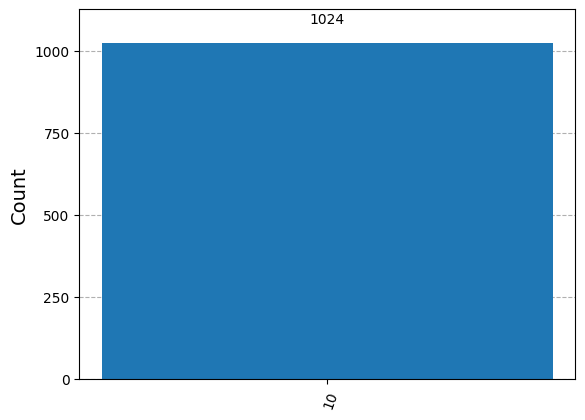

In [37]:
backend = BasicSimulator()
result = backend.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

Notice that the counts do not show randomness, as all inputs and outputs of the half-adder were measurable basis states.

Let’s now run the same simulation on a ‘fake backend’:

**Using fake backends**

In Qiskit, a “fake backend” is a simulated quantum processor designed to replicate the behavior of a real quantum device. The Fake Provider module provides various simulated backend classes that allow users to test transpilation and other backend functionalities without requiring actual quantum hardware.

Transpilation is a crucial step in quantum computing, where a high-level quantum circuit is converted into an optimized, lower-level form tailored for execution on a specific backend. This process ensures compatibility by adapting the circuit to the constraints of the target hardware, such as connectivity limitations and error rates.

GenericBackendV2 and Randomized Qubit Properties

In GenericBackendV2 (used below), qubit and gate properties—such as gate duration and error rates—are generated through random sampling from predefined ranges. This introduces variability, meaning that different executions may yield different backend characteristics.

To observe this randomness, ensure that qiskit-aer is installed by running the following command in a Jupyter cell or terminal:

```bash 
    pip install qiskit-aer
```



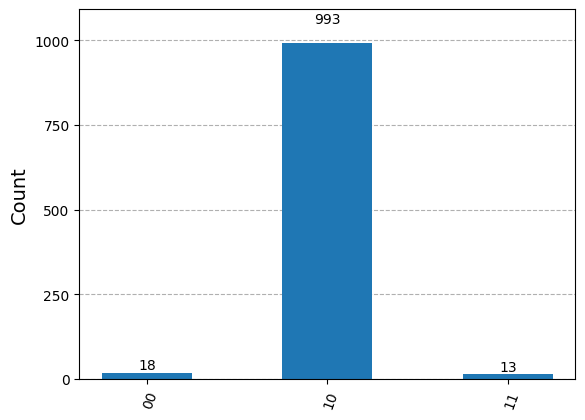

In [38]:
from qiskit.providers.fake_provider import GenericBackendV2
 
# Generate a 4-qubit simulated fake backend
# Several legacy fake backends are replaced with GenericBackendV2 in 1.0
backend = GenericBackendV2(num_qubits=4)  

# Transpile and run
transpiled_circuit = transpile(qc_ha, backend)
result = backend.run(transpiled_circuit).result()

counts = result.get_counts()
plot_histogram(counts)

**Grover’s Algorithm — 2 qubit example**

Finally, let’s implement a 2-qubit example of the Grover’s algorithm.

Grover’s algorithm aims to maximise the chance of measuring a specified state (called the ‘winning state’ |w⟩) from qubits initiated in a complete superposition. The following code implements this for the two-qubit case where |w⟩ =|11⟩.

Grover’s Algorithm is a quantum search algorithm that provides a quadratic speedup over classical search algorithms. While a classical search in an unsorted database of  N  elements requires  O(N)  time, Grover’s algorithm finds the solution in  O(\sqrt{N})  steps, making it significantly faster for large datasets.

Let’s break it down with a 2-qubit example, meaning we are searching for a marked item in a database of  $2^2 = 4$  elements.

1. Problem Setup (Search Space)

    In our 2-qubit system, the computational basis states are:
    |00\rangle, |01\rangle, |10\rangle, |11\rangle
    One of these states is marked as the “correct” solution, and Grover’s algorithm will amplify its probability amplitude.

2. **Steps of Grover’s Algorithm**

    Step 1: Initialize in Superposition
    We start with two qubits in the  |00\rangle  state and apply Hadamard gates to create an equal superposition of all possible states:

    $H^{\otimes 2} |00\rangle = \frac{1}{2} ( |00\rangle + |01\rangle + |10\rangle + |11\rangle )$

    This ensures that every basis state has an equal probability of being measured.

    
    **step 2: Oracle – Marking the Target State**

    The oracle is a special quantum function that recognizes the target state and applies a phase flip to it (multiplying it by -1).
    For example, if the marked state is  |11\rangle , the oracle transformation looks like:
    $
    \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & -1
    \end{bmatrix}$

    The oracle inverts the phase of the correct answer while leaving other states unchanged.

    **Step 3: Diffusion Operator (Amplitude Amplification)**

    After marking the solution, we apply the diffusion operator, which enhances the probability of the correct answer. The diffusion operator is:
	    1.	Apply Hadamard gates to return to the uniform superposition basis.
	    2.	Apply a conditional phase flip to the |00⟩ state.
	    3.	Apply Hadamard gates again to return to the computational basis.

    Mathematically, this step reflects the amplitudes of the quantum states about their average, reinforcing the marked state while suppressing the others.

    **Step 4: Measurement**

    After applying the oracle and diffusion once (since for 4 elements, we only need 1 iteration of Grover’s loop), we measure the qubits. The marked state has the highest probability of being observed, giving us the correct answer with high confidence.

Qiskit implementation

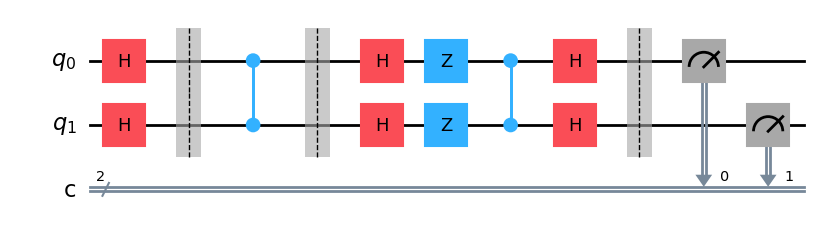

In [39]:
from qiskit import *

# Initialising a circuit with 2 qubits and 2 classical bits
gc = QuantumCircuit(2,2) 

# Putting the two qubits into the complete superposition state |s>
# This is done by applying Hadamard gates on both qubits [0,1]
gc.h([0,1])

gc.barrier()

# The 'oracle' function for |w> = |11> is a controlled z gate
# This implements the U_w rotation discussed in the video
gc.cz(0,1) 

gc.barrier()

# The following code implements the rotation U_s
# This rotates U_w|s> onto the winning state |w>
gc.h([0,1])
gc.z([0,1])
gc.cz(0,1)
gc.h([0,1])

gc.barrier()

# Measure qbits [0,1] into classical bits [0, 1]
gc.measure([0,1], [0,1]) 

# Draw the circuit
gc.draw(output = 'mpl')

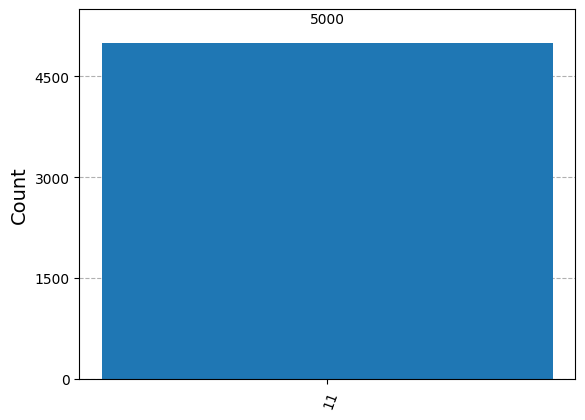

In [40]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Prepare and run the circuit 5000 times and show the statistical output
backend = BasicSimulator()
result = backend.run(gc, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)

## References and useful resources
- Quantum Computation and Quantum Information, Michael A. Nielsen & Isaac L. Chuang, Cambridge University Press 2010
- https://docs.quantum.ibm.com/api/qiskit 
- https://medium.com/@harini.hapuarachchi/a-beginners-guide-to-qiskit-1-0-c8e3e854d732 